## Génération de figures pour le chapitre « Estimation ponctuelle ».

In [2]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [81]:
plt.rc('font', **{'family':'sans', 'size': 18})

matplotlib.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': [r'\usepackage{mathptmx}',],
    'text.latex.unicode': True,})

/home/chagaz/.local/miniconda3/envs/snakes/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]


In [4]:
import pandas as pd

In [5]:
import scipy.stats as st

### Biais/variance

In [30]:
xxx = np.linspace(-5, 5, 500)

In [31]:
y = st.norm.pdf(xxx, 0, 1.)

In [58]:
y1 = st.norm.pdf(xxx, 1., 1.)

In [59]:
y2 = st.norm.pdf(xxx, 0, 1.5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


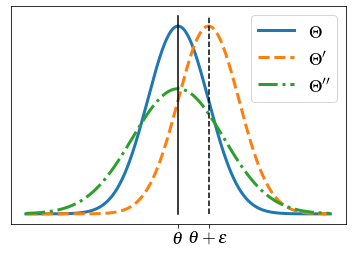

In [92]:
fig = plt.figure(figsize=(6, 4))
plt.plot(xxx, y, lw=3, label=r'$\Theta$')
plt.plot(xxx, y1, ls='--', lw=3, label=r'$\Theta^\prime$')
plt.plot(xxx, y2, ls='-.', lw=3, label=r'$\Theta^{\prime\prime}$')
plt.plot([0, 0], [0., 0.42], 'k')
plt.plot([1., 1.], [0, 0.42], 'k--')

t = plt.xticks([0, 1], [r'$\theta$', r'$\theta+\epsilon$'])
t = plt.yticks([], [])
plt.legend()
plt.savefig('../poly/figures/estimation/biais_variance.eps', bbox_inches='tight')

In [41]:
plt.

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=None,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    normed=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*,...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2-D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported at present.

Parameters
----------
x : (n,) array or sequence of (n,) arrays
